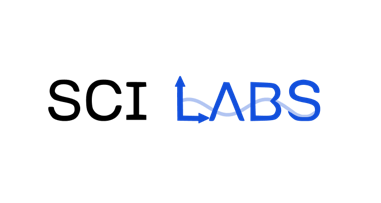

# Dostredivé zrýchlenie

Cieľom tohto protokolu je zoznámiť študenta s konceptom dostredivého zrýchelia a základmi Python jazyku.

Cieľom tohto merania bude určiť uhlovú rýchlosť centrifúgy nepriamou metodou. Merať budeme dáta z akcelerometru (SciLabs) čidla. Čidlo nemeria zrýchlenie v [m/s^2] ako by sme možno očakávali, ale v násobkoch "konštanty" g. Je to z kalibračných dôvodou. Keď nám čidlo ukáže hodnotu 1, znamená to, že v danej osi pôsobí na čidlo zrýchlenie o veľkosťi 9.81 $m/s^2$.





In [1]:
# nacitanie kniznic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_excel(r"/content/centrifuga2.xlsx") # nacitanie excelovskych dat
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
acc_x = np.array(df.iloc[:, 1][0:-1] )
acc_y = np.array(df.iloc[:, 2][0:-1] )
acc_z = np.array(df.iloc[:, 3][0:-1] )

FileNotFoundError: [Errno 2] No such file or directory: '/content/centrifuga2.xlsx'

Text(0, 0.5, '$a [g]$')

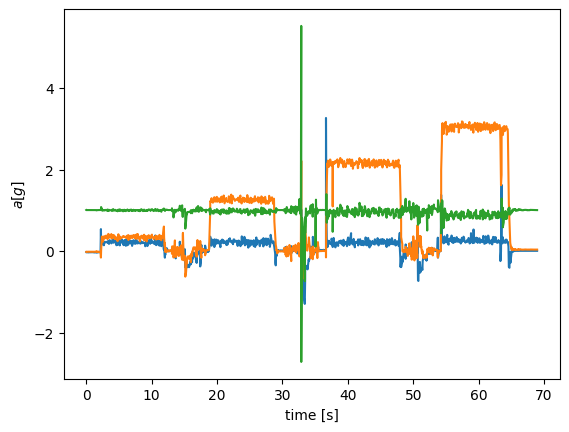

In [ ]:
# vykreslenie dat, upravte prvy riadok v zavislosti od toho ktoru zlozku zrychlenia chcete vykreslit

plt.plot(time,acc_x)
plt.plot(time,acc_y)
plt.plot(time,acc_z)
plt.xlabel('time [s]')
plt.ylabel('$a [g]$')

Na predchádzajúcom grafe vidno zložky zrýchlenia pôsobiace na rotujúci senzor pre rôzne vzdialenosti od osi centrifúgy. Vidíme, že pre rôzne vzdialenosti sa zrýchlenie líši. Pomocou interaktívneho grafu nižšie odčítame hodnoty (viacero, aby bolo možné vyčísliť smerodajnú odchýlku) aby sme mohli vykresliť ako závisí zrýchlenie na vzdialenosti.

Poznámka: kóde nižšie na príslušnom mieste určte, ktorá zložka vektora zrýchlenia odpovedá dostredivému zrýchleniu (a_x, a_y alebo a_z)

In [ ]:
import plotly.graph_objects as go
import numpy as np

np.random.seed(42)
random_data = np.random.randn(100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = time,
    y = acc_y, # vyberte príslušnú zložku zrýchlenia (a_x, a_y, a_z)
    mode='lines+markers',
    name='Dostredivé zrýchlenie'
))

fig.update_traces(
    hoverinfo='x+y',
    hovertemplate='X: %{x}<br>Y: %{y}<extra></extra>',
    marker=dict(size=5),
    line=dict(width=1)
)

fig.update_layout(
    hovermode='y unified',
    xaxis=dict(showspikes=True),
    yaxis=dict(showspikes=True),
)

fig.show()

Vysvetlivky:

L - vzdialenosť senzoru od osi

a1_data - a4_data - odčítané hodnoty zrýchlenia pre prvú až štvrtú zarážku na centrifúge

Do vektorov pre zrýchlenie je potrebné odčítať viacero hodnôt, aby bolo možné spočítať chybu merania

In [ ]:
# vypocet frekvencie otacania centrifugy

L = [1.8,4.8,7.8,10.8] # pole, do ktoreho sa zapisu vzdialenosti senzoru od osi otacania v cm
a1_data = np.array([0.37, 0.35, 0.32, 0.34, 0.28, 0.35, 0.29, 0.28 ]) * 9.81 # amplituda zryclenia pocas otacania
a2_data = np.array([1.32, 1.25 ]) * 9.8
a3_data = np.array([2.18, 2.13, 2.14, 2.19, 2.05, 2.13, 2.19, 2.08 ]) * 9.8
a4_data = np.array([3.06, 2.98, 3.12, 3.10 ]) * 9.8

In [ ]:
# funkcia, ktora spočíta aritmetický priemer a smerodatnú odchýlku z nameraných dát

def process_data(data):
  n_data = len(data) # pocet merani
  average = np.sum(data) / n_data # aritmeticky priemer

  sigma = np.sqrt( np.sum((data-average)**2) / (n_data - 1)) # vypocet vyberovej smerodatnej odchylky

  sigma_round = round(sigma,2) # zaokruhlenie priemernej hodnoty na prvu platnu cislicu
  average_round = round(average,2) # zaokruhlenie priemernej hodnoty na dve desatine miesta
  return average_round, sigma_round

In [ ]:
# spočítanie priemeru a smerodatnej odchýlky pre namerané dáta

a1_value, a1_sigma = process_data(a1_data)
a2_value, a2_sigma = process_data(a2_data)
a3_value, a3_sigma = process_data(a3_data)
a4_value, a4_sigma = process_data(a4_data)

a = [a1_value, a2_value, a3_value, a4_value]
sigma = [a1_sigma,a2_sigma,a3_sigma,a4_sigma]

Text(0, 0.5, 'a [ms$^{-2}$]')

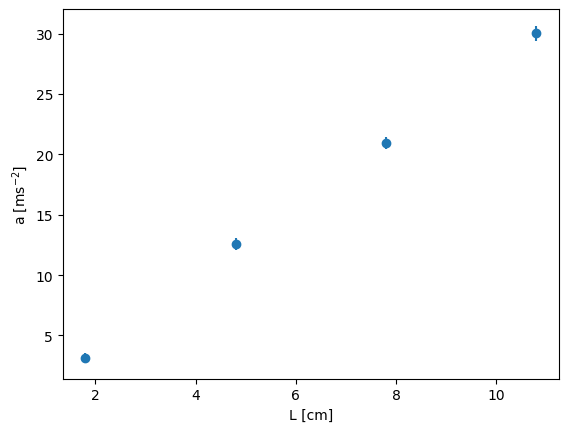

In [ ]:
plt.errorbar(L, a, yerr=sigma, fmt='o')
plt.xlabel('L [cm]')
plt.ylabel('a [ms$^{-2}$]')

Závislosť vyzerá lineárne - čím väčšia vzdialenosť senzora od osi otáčania, tým väčšie zrýchlenie naň pôsobí. Pokúsime sa teda prísť na to, ako vyzerá závislosť a pripíšeme konštantám fyzikálny význam.

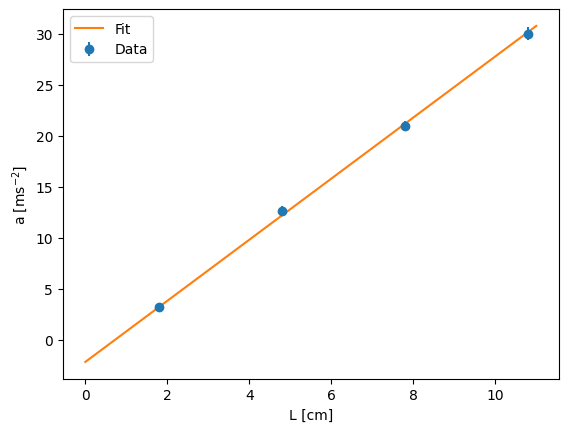

In [ ]:
plt.errorbar(L, a, yerr=sigma, fmt='o',label = 'Data')
plt.xlabel('L [cm]')
plt.ylabel('a [ms$^{-2}$]')

x = np.linspace(0,11,300)

# Menením konštánt meníme tvar lineárnej závislosti
k = 3
q = -2.2

y = k * x + q

plt.plot(x,y,label= 'Fit')
plt.legend()

Spomenme si na vzťah pre veľkosť dostredivého zrýchlenia.

$$
a_{c} = \frac{v^2}{r} = \omega^2 \cdot r
$$

Hodnota $a_{c}$ je v našom prípade nameraná pomocou senzoru. Ak si predstavíme túto závislosť ako priamku *y = kx + q*, vidíme, že hodnota ktorú sme získali z fitovania pre konštantu *k* odpovedá štvorcu uhlového zrýchlenia $\omega^2$, teda uhlovej frekvencii.

